# Chatper 6. Bayesian Approaches

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\renewcommand{\bold}[1]{\boldsymbol{#1}}
\newcommand{\c}[1]{\mathcal{#1}}
$$

## Contents    
* Bayes' theorem

* Bayesian linear regression (Bishop, Chater 3)

* Bayesian model comparison

* Bayesian networks  (Bishop, Chater 8)

* Dynamic Bayesian inference

* Bayesian Brain
    * Sensory psychophysics
    * Cortical circuit

## Bayes’ Theorem

Let us recall the two fundamental rules of probability regarding random variables $X$ and $Y$:

* Sum rule:  

$$  p(X) = \sum_Y p(X, Y) $$

* Product rule:  

$$  p(X,Y) = p(Y|X) p(X) $$

From the symmetry of joint probability $p(X,Y)=p(Y,X)$,  
we have the relationship $p(X|Y)p(Y) = p(Y|X)p(X)$,  
which brings us to Bayes' theorem:  

$$  p(X|Y) = \frac{p(Y|X)p(X)}{p(Y)}. $$

Using Bayes' theorem, we can convert one conditional probability to the other.
This simple formula has turned out to be very insightful in the context of sensory processing and learning. 

Suppose $X$ is the variable of your interest, such as the existence of your target, and $Y$ is a noisey sensory input. What sensory input $Y$ you would receive if your target exists or not is represented by a sensory model $p(Y|X)$.  

* Your knowledge or assumption about existence of your target is represented by $p(X)$, called *prior probability*.  

* For a given sensory input $y$, $p(Y=y|X)$ as a function of $X$ is called the *likelihood* of the state $X$.

* The probability of the target $X$ existing after observing $y$, $p(X|Y=y)$ is called the *posterior probability*.

Bayes' theorem gives a theoretical basis for the intuition that the posterior probability is proportional to the product of the prior prbability and the likelihood.

### Example: mouse in a bush

You are a cat chasing a mouse and heard a rustuling sound from a bush. 
About half of the case a hiding mouse makes a sound, but about 10% of the time you hear rustling just by the wind. 
How would you estimate the probability for a mouse hiding in the bush?

| $p(Y \vert X)$ | no mouse $X=0$ | mouse hiding $X=1$ |
| --- | :---: | :---: |
| no sound $Y=0$  | 0.9 | 0.5 |
| sound $Y=1$  | 0.1 | 0.5 |

For example, if you heard a sound, $Y=1$, what is the probability of a mouse hiding behind the bush, $p(X=1|Y=1)$?
From the above table, 0.5?

No, actually. In the 'heard' row, 0.1 and 0.5 do not sum up to one. They are likelihoods $p(Y=1|X)$, but not probability distribution $p(X|Y=1)$ for the mouse to be in the bush or not.

The mouse ran into other nearby bushes, so you assume that the prior probability of the mouse in this bush is 30%:

| prior probability | no mouse $X=0$ | mouse hiding $X=1$ |
| :---: | :---: | :---: |
| $p(X)$ | 0.7 | 0.3 |

By having this prior probability, we can use Bayes' theorem:

$$  p(X=1|Y=1) = \frac{p(Y=1|X=1)p(X=1)}{p(Y=1|X=0)p(X=0)+p(Y=1|X=1)p(X=1)}  $$

$$  = \frac{0.5*0.3}{0.1*0.7+0.5*0.3}
    = \frac{0.15}{0.07+0.15} 
    = \frac{0.15}{0.22} \simeq 0.68  $$

## Iterative Bayesian Inference

A useful property of Bayesian inference is that you can apply it iteratively to incoming data stream.

We denote the sequence of observations up to time $t$ as

$$  y_{1:t}=(y_1,...,y_t)  $$

and want to estimate the cause $x$ of these observations

$$  p(x|y_{1:t}) = \frac{p(y_{1:t}|x)\ p(x)}{p(y_{1:t})}  $$

If the observations are independent, their joint distribution is a product

$$  p(y_{1:t}|x) = p(y_1|x)\cdots p(y_t|x)  $$
and thus the posterior can be decomposed as

$$  p(x|y_{1:t}) = \frac{p(y_1|x)\cdots p(y_{t-1}|x)\ p(y_t|x)\ p(x)}{p(y_1)\cdots p(y_{t-1})\ p(y_t)}  $$

$$  = \frac{p(y_1|x)\cdots p(y_{t-1}|x)\ p(x)}{p(y_1)\cdots p(y_{t-1}) }\ \frac{p(y_t|x)}{p(y_t)}  $$

$$  = \frac{p(x|y_{1:t-1})\ p(y_t|x)}{p(y_t)}.  $$

This means that the posterior $p(x|y_{1:t-1})$ that you computed by time $t-1$ serves as the prior to be combined with the likelihood for the new coming data $p(y_t|x)$ for computing the new posterior $p(x|y_{1:t})$.

This iterative update of the posterior is practically helpful in online inference utilizing whatever data available so far.

### Coin toss

Here is a simple example of estimating the parameter $\mu$, probability for a coin to land head up, during multiple tosses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# take samples
mu = 0.3  # probability of head
N = 8   # number of samples
y = np.random.choice(2, N, p=[1-mu, mu]) # binary observation sequence
y

array([1, 1, 0, 0, 0, 0, 0, 1])

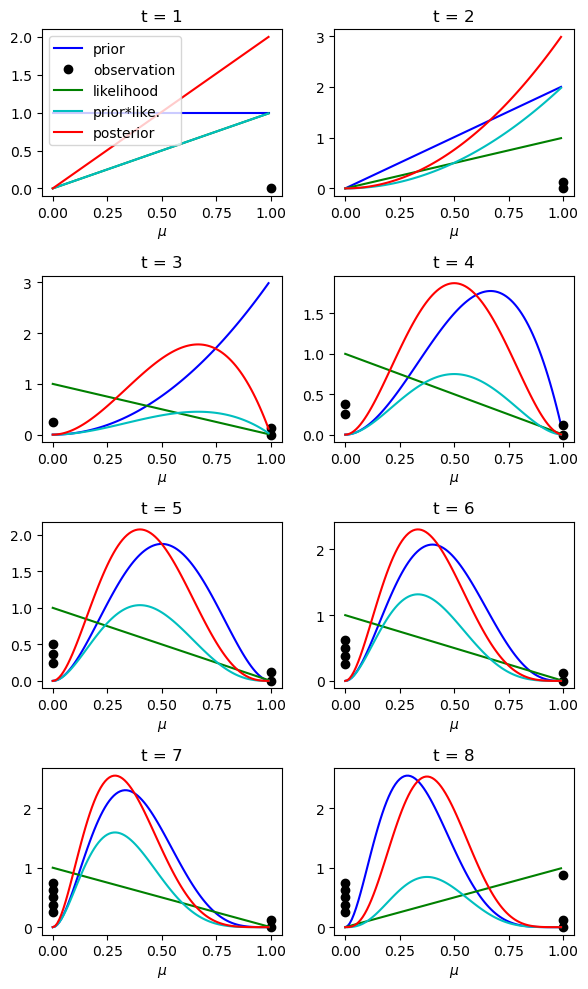

In [3]:
dx = 0.01  # plot step
x = np.arange( 0, 1, dx)  # range of the parameter
prior = np.ones( len(x))  # Assume a uniform prior
plt.figure(figsize=(6,10))
for t in range(N):
    plt.subplot(4, 2, t+1)  # a new figure
    # prior
    plt.plot( x, prior, 'b')
    # observation
    plt.plot( y[0:t+1], np.arange(t+1)/N, 'ko')
    # likelihood
    likelihood = x*y[t] + (1-x)*(1-y[t]) # theta if head, 1-theta if tail
    plt.plot( x, likelihood, 'g')
    # product
    prilik = prior*likelihood
    plt.plot( x, prilik,'c')
    # posterior by normalization
    marginal = sum(prilik)*dx    # integrate over the parameter range
    posterior = prilik/marginal  # normalize
    plt.plot( x, posterior, 'r')
    plt.xlabel(r'$\mu$')
    if t==0:
        plt.legend(('prior', 'observation', 'likelihood', 'prior*like.', 'posterior'))
    plt.title(f't = {t+1}')
    # posterior as a new prior
    prior = posterior
plt.tight_layout()
plt.show()

As more data are collected, the posterior distribution of $\mu$ becomes sharper and colser to the true value.

## Noisy observation

Estimate the mean $\mu$ and the standard deviationn $\sigma$ from noisy observations.

In [4]:
# Noisy observation: y = N(mu,sigma)
mu = 1
sigma = 2
N = 12
y = mu + sigma*np.random.randn(N)
print(y)

[-1.21888654 -0.22300747 -0.00427536  0.10852993  0.78885139  1.55845329
  3.36868206 -0.35629875 -0.92891398  1.61149195 -2.28283007 -0.46180603]


In [5]:
# Start from a uniform prior
rmu = 5; dmu = 0.2   # range and step of mu
rsig = 5;  dsig = 0.2 # range and step of sigma
m = np.arange(-rmu, rmu, dmu)
s = np.arange(rsig, 0, -dsig)
M, S = np.meshgrid(m, s)
prior = np.ones_like(M)/(2*rmu*rsig)

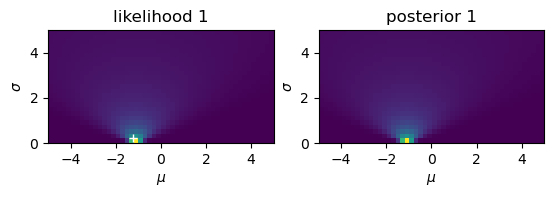

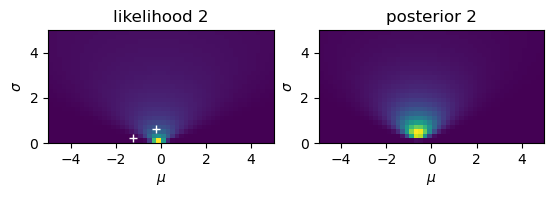

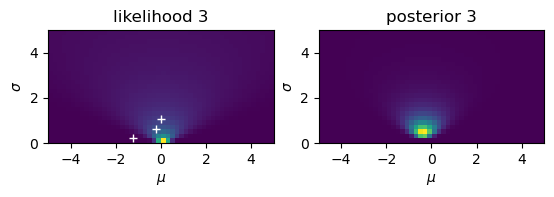

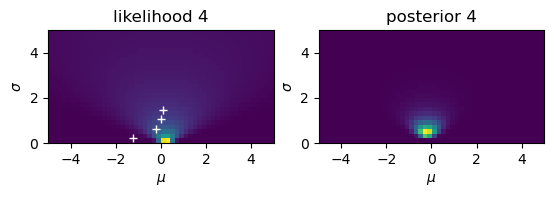

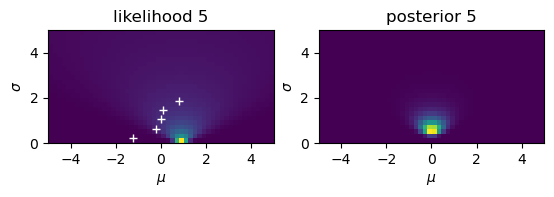

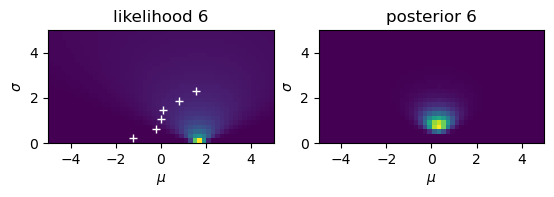

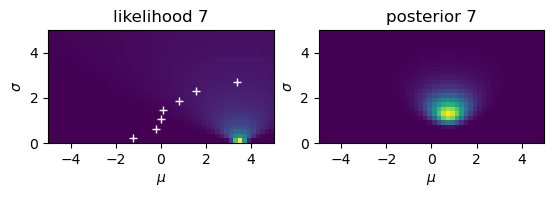

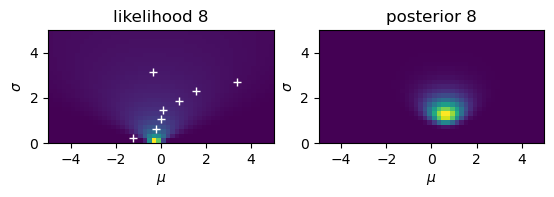

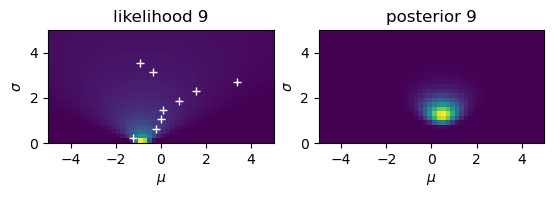

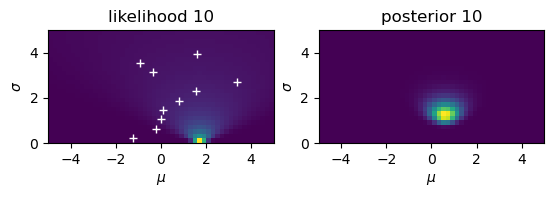

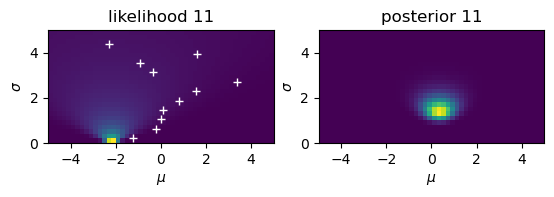

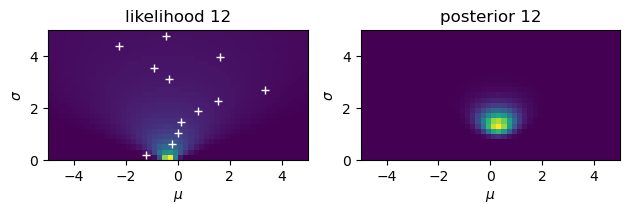

In [6]:
for n in range(N):
    plt.figure()
    plt.subplot(1, 2, 1)
    # observation
    plt.plot( y[0:n+1], dsig+rsig*np.arange(n+1)/N, 'w+')
    # likelihood
    likelihood = np.exp(-((y[n]-M)/S)**2/2)/(np.sqrt(2*np.pi)*S)
    plt.imshow(likelihood, extent=(-rmu,rmu,0,rsig))
    plt.xlabel(r'$\mu$'); plt.ylabel(r'$\sigma$');
    plt.title(f'likelihood {n+1}')
    # posterior
    plt.subplot(1, 2, 2)
    prilik = prior*likelihood
    #plt.imshow(prilik, extent=(-rmu,rmu,0,rsig))
    marginal = np.sum(prilik)*dmu*dsig
    posterior = prilik/marginal
    plt.imshow(posterior, extent=(-rmu,rmu,0,rsig))
    plt.xlabel(r'$\mu$'); plt.ylabel(r'$\sigma$');
    plt.title(f'posterior {n+1}')
    prior = posterior  # new prior
plt.tight_layout()
plt.show()

## Bayesian approaches in machine learning

"Bayesian" is quite popular in machine learning, but it is used for different meanings:

* To combine prior knowledge and the likelihood from observation

* To assume a graphical model of data generation for estimation of the causes

* To estimate the distribution of a variable, not a single point

In supervised learning:
* avoid over fitting by introducing a prior distribution on the parameters
* compare models by their probability of producing observed data

In reinforcement learning:
* infer the environmental state from incomplete observation
* estimate the distribution of reward, not just the expectation

In unsupervised learning:
* infer hidden variables behind data
    * e.g. responsibility in Mixtures of Gaussians

## Bayesian Linear Regression

The standard linear regression (Chapter 3) assumes a linear regression function with additive noise 
$$ t_n = \bold{w}^T\bold{x}_n + \epsilon $$
where $p(\epsilon)=\mathcal{N}(0,\beta^{-1})$.

In Bayesian linear regression, we assume that the weights are sampled from a prior distribution $p(\bold{w})=\mathcal{N}(\bold{0},\alpha^{-1}I)$.

The likelihood of the parameter $\bold{w}$ for the target output $\bold{t}$ is

$$ p(\bold{t}|X, \bold{w}, \beta) = \prod_{n=1}^N \mathcal{N}(t_n|\bold{w}^T\bold{x}_n,\beta^{-1}) $$

When both the prior and likelihood are Gaussian, the posterior will also be Gaussian and have the form:

$$ p(\bold{w}|\bold{t}) = \mathcal{N}(\bold{w}|\bold{m},S) $$

where

$$ \bold{m} = \beta S X^T \bf{t} $$

and

$$ S = (\alpha I + \beta X^T X)^{-1} $$

If we let $\alpha=0$, i.e. infinitely large variance for the weight prior, this is equivalent to regular linear regression. Introducing a penalty term is commonly done in linear regression as

$$ E(\bold{w}) = \frac{\beta}{2}\sum_{n=1}^N \{t_n - \bold{w}^T \bold{x}_n\}^2
+ \frac{\alpha}{2} \bold{w}^T\bold{w} $$

$$ = \frac{\beta}{2} ||\bold{t} - X \bold{w}||^2 + \frac{\alpha}{2} ||\bold{w}||^2. $$

The Bayesian regression gives a probabilistic interpretation on the role of the regularization parameter $\alpha$.

In [7]:
# We will use this frequently
def gauss(x, mu=0, sigma=1):
    """Gaussian distribution"""
    return np.exp(-((x-mu)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

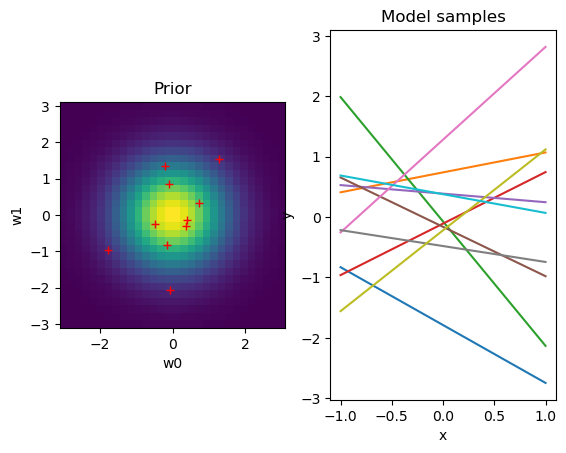

In [8]:
# Distributions in the parameter and data spaces
alpha = 1.  # inverse variance of weight prior
beta = 10  # inverse variance of observation noise
# prior distribution of weights
W = np.linspace(-3, 3, 30)
W0, W1 = np.meshgrid(W, W)
pw = gauss(W0)*gauss(W1)
# plot the distribution
plt.subplot(1,2,1)
plt.pcolormesh(W, W, pw)  
# sample weight from prior distribution
K = 10  
wpri = np.random.normal(scale=alpha**-0.5,size=2*K).reshape(K,2)
plt.plot(wpri[:,0], wpri[:,1], "r+")
plt.axis('square');
plt.title("Prior"); plt.xlabel("w0"); plt.ylabel("w1");
# plot model samples
xrange = np.array([-1., 1.])   # range of input x
plt.subplot(1,2,2)
for k in range(K):
    #wpri[1,k]*X
    plt.plot(xrange, wpri[k,0]+wpri[k,1]*xrange)
plt.title("Model samples"); plt.xlabel("x"); plt.ylabel("y");    
plt.show()

m = [-0.9494766  0.9943837]
S = [[0.02056107 0.00753356]
 [0.00753356 0.05953912]]


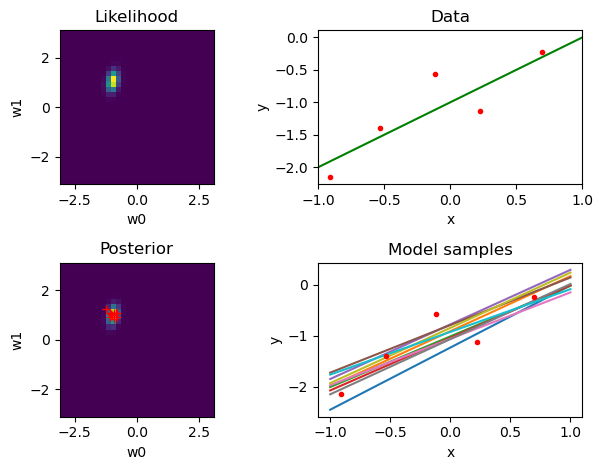

In [9]:
# after observation of data
N = 5
wt = np.array([-1, 1])  # 'true' weights
# sample data
X = np.random.uniform(xrange[0], xrange[1], size=N)
X = np.c_[np.ones(N), X]  # prepend 1 in the leftmost column
t = wt@X.T + np.random.normal(size=N)/np.sqrt(beta)
plt.subplot(2,2,2)  # start from top right
plt.plot(xrange, wt[0]+wt[1]*xrange, "g")
plt.plot(X[:,1], t, "r.")  # training data
plt.xlim(xrange)
plt.title("Data"); plt.xlabel("x"); plt.ylabel("y");
# likelihood
like = 1
for n in range(N):
    like = like*gauss(t[n] - (W0+W1*X[n,1]), sigma=beta**(-0.5))
plt.subplot(2,2,1)   # top left
plt.pcolormesh(W, W, like)
plt.axis('square')
plt.title("Likelihood"); plt.xlabel("w0"); plt.ylabel("w1");
# new posterior
plt.subplot(2,2,3)
post = pw*like
plt.pcolormesh(W, W, post)
plt.axis('square')
plt.title("Posterior"); plt.xlabel("w0"); plt.ylabel("w1");
S = np.linalg.inv(alpha*np.eye(2) + beta*X.T@X)
m = beta*S@X.T@t
print('m =', m)
print('S =', S)
# sample weights
wpost = np.random.multivariate_normal(m, S, K)
plt.plot(wpost[:,0], wpost[:,1], "r+")
# plot model samples
xrange = np.array([-1., 1.])   # range of input x
plt.subplot(2,2,4)
for k in range(K):
    #wpri[1,k]*X
    plt.plot(xrange, wpost[k,0]+wpost[k,1]*xrange)
plt.plot(X[:,1], t, "r.")  # training data
plt.title("Model samples"); plt.xlabel("x"); plt.ylabel("y");
plt.tight_layout()  # adjust subplot margins
plt.show()

### Predictive distribution
In Bayesian regression, the result is not one weight vector, but a distribution in the weight space. Then it is reasonable to consider the distribution of the output considering such uncertainty in the weigts.

The output $y$ for a new input $\bold{x}$ should have the distribution

$$ p(y|\bold{x},\bold{t},\alpha,\beta) 
 = \int p(y|\bold{x},\bold{w},\beta)  p(\bold{w}|\bold{t},\alpha,\beta) d\bold{w} $$

$$ = \mathcal{N}(t|\bold{m}^T \bold{x}, \sigma^2(\bold{x})) $$
where the variance of the output is given by

$$ \sigma^2(\bold{x}) = \beta^{-1} + \bold{x}^T S \bold{x} $$

Let us see the example of approximating a sine function by Gaussian basis functions.

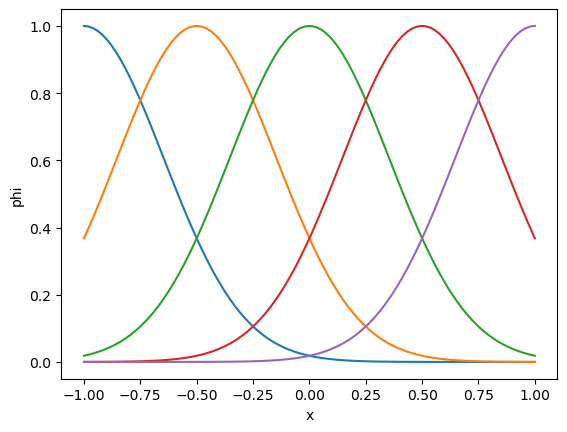

In [10]:
# 1D Gaussian basis functions 
def gbf1(x, xrange=[-1.,1.], M=10):
    """Gaussian basis functions: x can be a 1D array"""
    xc = np.linspace(xrange[0], xrange[1], num=M)  # centers
    xd = (xc[1]-xc[0])  # interval
    # x can be an array for N data points
    return np.exp(-((np.tile(x,[M,1]).T - xc)/xd)**2)
# example
x = np.linspace(-1, 1, 100)
plt.plot(x, gbf1(x, M=5));
plt.xlabel("x"); plt.ylabel("phi");
plt.show()

In [11]:
def blr(X, t, alpha=1., beta=10.):
    """Bayesian linear regression
    alpha: inv. variance of weight prior 
    beta: inv. variance of observation noise
    """
    N, D = X.shape
    S = np.linalg.inv(alpha*np.eye(D) + beta*X.T@X) # posterior covariance
    m = beta*S@X.T@t   # posterior mean
    return m, S

In [12]:
def target(x):
    """Target function"""
    return np.sin(x)

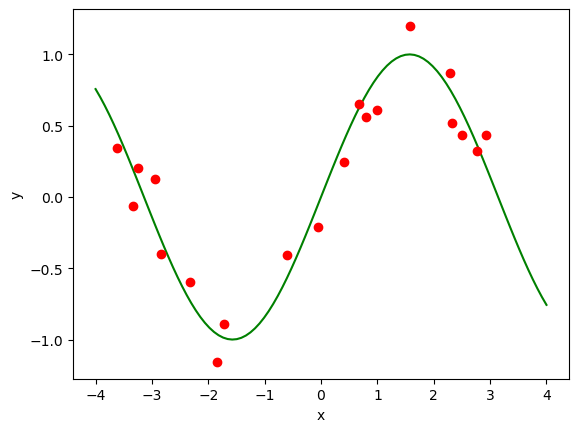

In [13]:
# Training data
N = 20
eps = 0.2  # noise size
xr = 4   # range of x
x = np.random.uniform(-xr, xr, size=N)  
f = target(x)  # target function
t = f + np.random.normal(scale=eps, size=N) # with noise
# data for testing/plotting
Np = 100
xp = np.linspace(-xr, xr, Np)
fp = target(xp)
plt.plot(xp, fp, "g")  # target function
plt.plot(x, t, "ro");  # training data
plt.xlabel("x"); plt.ylabel("y");
plt.show()

[ 1.71357705e-02  9.05527428e-02  5.64537450e-02  3.39531048e-02
 -5.10125590e-02 -1.02480498e-01 -1.61969791e-01 -2.37121551e-01
 -4.36179943e-01 -1.66263001e-01 -1.06797444e-02 -2.20455553e-02
 -1.10503117e-01 -8.65188894e-02 -6.41050443e-02 -2.36968044e-02
  1.01211344e-01  2.57340575e-01  2.21858333e-01  1.43087202e-01
  3.45820665e-01  2.05217661e-01  1.65395598e-01  2.94192078e-01
  1.47591097e-01  1.41669377e-01  5.62322982e-02  3.46069107e-03
  2.97674958e-05  3.49738136e-08]


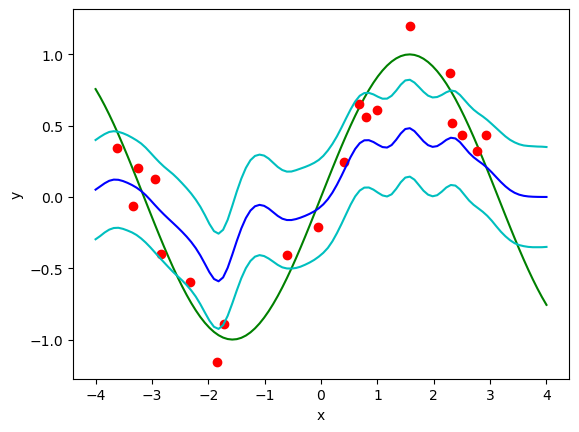

In [14]:
M = 30  # number of basis functions
Phi = gbf1(x, [-xr,xr], M)  # Gaussian basis functions
m, S = blr(Phi, t, alpha=50, beta=25)  # Bayesian linear regression
print(m)
# test data
Phip = gbf1(xp, [-xr,xr], M)
yp = Phip@m.T
plt.plot(xp, fp, "g")  # target function
plt.plot(x, t, "ro");  # training data
plt.plot(xp, yp, "b");  # MAP estimate
# predictive distribution
sigma = np.sqrt(1/beta + np.sum(Phip@S*Phip, axis=1))
plt.plot(xp, yp+sigma, "c")
plt.plot(xp, yp-sigma, "c")
plt.xlabel("x"); plt.ylabel("y");
plt.show()

See how $N$, $M$, $\alpha$ and $\beta$ affect the performance.

## Bayesian model comparison

We have so far considered Bayesian inference of the parameter $\bold{w}$ for a given model $\c{M}$, such as a regression model with some input variables, but we can also think of Bayesian inference of probability over models $\c{M}_i$, such as regression models with different choices of input variables, given data $\c{D}$

$$ p(\c{M}_i|\c{D}) \propto p(\c{M}_i) p(\c{D}|\c{M}_i). $$

Here $p(\c{D}|\c{M}_i)$, the likelihood of a model given data, is called the *evidence* of the model. 

If we include a model explicitly in our Bayesian parameter estimation, we have

$$ p(\bold{w}|\c{D},\c{M}_i) = \frac{p(\c{D}|\bold{w},\c{M}_i)p(\bold{w}|\c{M}_i)}{p(\c{D}|\c{M}_i)}, $$

where we have the *evidence* as the normalizing denominator

$$ p(\c{D}|\c{M}_i) = \int p(\c{D}|\bold{w},\c{M}_i)p(\bold{w}|\c{M}_i) d\bold{w}. $$

This is also called *marginal likelihood* because it is the likelihood of the model with its parameters marginalized.

### Computing model evidence

In Bayesian linear regression, the model evidence with the *hyperparamters* $\alpha$ (weight prior) and $\beta$ (observation noise) is given by integration over all the range of the weight parameters $\bold{w}$:

$$ p(\bold{t}|\alpha,\beta) = \int p(\bold{t}|\bold{w},\beta)p(\bold{w}|\alpha) d\bold{w}, $$

By further integrating this over the prior distribution of $\alpha$ and $\beta$ we have the evidence for the full model.

A practical approximation is to find $\alpha$ and $\beta$ that maximize $p(\bold{t}|\alpha,\beta)$.

The log evidence is given as (Bishop, Chapter 3.5)

$$ \log p(\bold{t}|\alpha,\beta) 
    = -\frac{\beta}{2} ||\bold{t}-X\bold{m}||^2 - \frac{\alpha}{2} ||\bold{m}||^2 $$

$$  + \frac{1}{2}\log|S| + \frac{D}{2}\log\alpha + \frac{N}{2}(\log\beta - \log(2\pi)) $$

where $\bold{m}$ and $S$ also depend on $\alpha$ and $\beta$.

For $N>>D$, the evidence is maximized by

$$ \alpha^{-1} = \frac{1}{D}||\bold{m}||^2 $$

$$ \beta^{-1} = \frac{1}{N}||\bold{t} - X \bold{w}||^2. $$

In [15]:
def logev(X, t, m, S):
    """log evidence for Bayesian regression
    m: posterior mean
    S: posterior covariance
    alpha: inv. variance of weight prior 
    beta: inv. variance of observation noise
    """
    N, D = X.shape
    #S = np.linalg.inv(alpha*np.eye(D) + beta*X.T@X) # posterior covariance
    #m = beta*S@X.T@t   # posterior mean
    em = t - X@m.T  # error with MAP estimate
    alpha = D/np.dot(m,m)
    beta = N/np.dot(em,em)
    # log evidence
    lev = -beta/2*np.dot(em,em) - alpha/2*np.dot(m,m) + np.log(abs(np.linalg.det(S)))/2 + D/2*np.log(alpha) + N/2*(np.log(beta/(2*np.pi)))
    return lev, alpha, beta

Try computing log evidence for different $M$ 

2 1.3019441688969235 4.642862826668434 -18.76708035458362 0.43782267293593846
3 2.290981484508095 5.257777422100218 -18.81405892403783 0.4439620885984786
4 0.42106841302482023 33.98137337338351 -5.1620665839401845 0.027576510975003087
5 1.0345989901547505 36.735449435418744 -4.447262764124215 0.012619308716584112
6 2.236819514691169 36.96089514686769 -3.8311705525649202 0.020239530670388924
7 3.496847263266881 39.33271363426258 -2.915097783102947 0.033044517541785466
8 3.353397248193443 50.20177245619844 -1.7921301894923758 0.07347659556845863
9 4.247070059070918 49.43933155637993 -1.7707274828290345 0.08224377494086524
10 5.172445317094519 49.96593561892658 -1.544126412832643 0.07345916410408941
11 5.624452045691535 54.48314963504749 -1.142543629301212 0.07406090330775095
12 4.735436213824425 64.84390807402163 -0.6656783165208608 0.09582261072508341
13 5.040066942094098 63.6357574797169 -1.0391997480844601 0.11408469576266043
14 5.506381785642079 65.26531687189548 -0.9243896385231842 

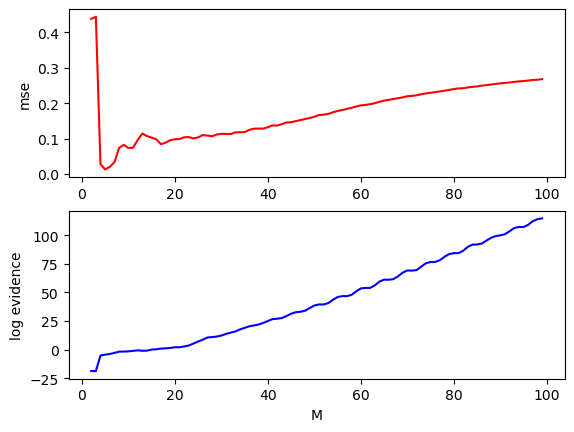

In [16]:
# try different values of M
Max = 100  # max number of basis functions
mse = np.zeros(Max)  # mean square errors
lev = np.zeros(Max)  # log evidences
for M in range(2,Max):
    Phi = gbf1(x, [-xr,xr], M)  # Gaussian basis functions
    m, S = blr(Phi, t, alpha=1, beta=25)
    lev[M], alpha, beta = logev(Phi, t, m, S)
    # test data
    Phip = gbf1(xp, [-xr,xr], M)  # Gaussian basis functions
    err = fp - Phip@m.T  # validation error
    mse[M] = np.dot(err,err)/Np
    print(M, alpha, beta, lev[M], mse[M])
plt.subplot(2,1,1)
plt.plot(np.arange(2,Max), mse[2:], "r"); plt.ylabel("mse");
plt.subplot(2,1,2)
plt.plot(np.arange(2,Max), lev[2:], "b"); plt.ylabel("log evidence");
plt.xlabel("M");
plt.show()

## Bayesian networks


As we have seen in the example of Bayesian linear regression, statistical machine learning assumes a *generative model* of the observed data and infer the posterior probability of variables of your interest, after marginalizing other unobserved variables.

In doing so, representation of the relationships by graphs with random variables as nodes (or vertices) and joint or conditional probabilities as links (or edges or arcs) have turned out to be very useful. They are called *graphical models*.

Directed graphs representing conditional probabilities by arrows (directed edges) are called *Bayesian networks*.

For example, Bayesian linear regression can be represented as a Bayesian network as below.

><img src="figures/BN_blr.png" width="200px">
>Graphical model for the Bayesian linear regression.

Inference in Bayesian network goes like this: as values of some variables are observed, 
* *clamp* the values of the nodes where observation was made.
* compute the posterior distributions of the nodes along the graph by repeating Bayesian inference and marginalization

In doing this, the *conditional independence* of the nodes allows efficient computation.

## Inference on a chain

Here we consider the simplest case of a chain of discrete random variables. 

>![Chain](figures/BN_chain.png)
>Graphical model of a chain of states.

For each node, the variable takes an integer value $x_n \in \{1,...,K_n\}$ and we consider the joint distribution over the entire nodes:

$$  p(x_1,...,x_N) = p(x_1)p(x_2|x_1) \cdots p(x_{N-1}|x_{N-2})p(x_N|x_{N-1}). $$

When an observation $x_N=k$ is made at the end node, we would consider the posterior distribution

$$  p(x_1,...,x_{N-1}|x_N=k) \propto 
    p(x_1)p(x_2|x_1) \cdots p(x_{N-1}|x_{N-2})p(x_N=k|x_{N-1}).  $$

The posterior distribution of each node $x_n$ is given by marginalization

$$  p(x_n|x_N=k) \propto \sum_{x_1}\cdots\sum_{x_{n-1}}\ 
    \sum_{x_{n+1}}\cdots\sum_{x_N}p(x_1,...,x_{N-1}|x_N=k) $$
    
$$  = \left\{\sum_{x_{n-1}}p(x_n|x_{n-1}) \cdots
    \sum_{x_1}p(x_2|x_1)p(x_1)\right\} $$
    
$$  \times \left\{\sum_{x_{n+1}}p(x_{n+1}|x_n) \cdots 
    \sum_{x_{N-1}}p(x_{N-1}|x_{N-2}) \sum_{x_N}p(x_N=k|x_{N-1})\right\}  $$

This can be computed efficiently by passing two *messages*:

* Forward message $\alpha_n$ of prior:

$$ \alpha_1 = p(x_1)$$

$$ \alpha_n = \sum_{x_{n-1}} p(x_n|x_{n-1}) \alpha_{n-1} $$

* Backward message $\beta_n$ of likelihood:

$$ \beta_N = (0,...,1,...0) $$
with $1$ at $k$-th component and

$$ \beta_n = \sum_{x_{n+1}} p(x_{n+1}|x_n) \beta_{n+1} $$

The posterior distribution for each node is then given by their product

$$  p(x_n|x_N=k) \propto \alpha_n \beta_n. $$

This is called *forward-backward* algorithm. 

This can be generalized to tree-like networks and the algorithm using forward and backward message passing is known as *belief propagation*.

### Markov chain

Here is an example of inference in a Markov chain.

In [17]:
class Markov:
    """Class for a Markov chain"""
    
    def __init__(self, ptr):
        """Create a new environment"""
        self.ptr = ptr  # transition matrix p(x'|x)
        self.Ns = len(ptr)  # number of states
        
    def sample(self, x0=0, step=1):
        """generate a sample sequence from x0"""
        seq = np.zeros(step+1, dtype=int) # sequence buffer
        seq[0] = x0
        for t in range(step):
            pt1 = self.ptr[:, seq[t]] # prob. of new states
            seq[t+1] = np.random.choice(self.Ns, p=pt1) # sample 
        return seq
    
    def forward(self, p0, step=1):
        """forward message from initial distribution p0"""
        alpha = np.zeros((step+1, self.Ns)) # priors
        alpha[0] = p0  # initial distribution
        for t in range(step):
            alpha[t+1] = self.ptr @ alpha[t] 
        return alpha

    def backward(self, obs, step=1):
        """backward message from terminal observaion"""
        beta = np.zeros((step+1, self.Ns)) # likelihoods
        beta[-1] = obs  # observation
        for t in range(step, 0, -1): # toward 0
            beta[t-1] = beta[t] @ self.ptr
        return beta
    
    def posterior(self, p0, obs, step):
        """forward-backward algorithm"""
        alpha = self.forward(p0, step)
        beta = self.backward(obs, step)
        post = alpha*beta
        for t in range(step+1):
            post[t] = post[t]/sum(post[t])  # normalize        
        return post

Here is an example of directed random walk on a ring.

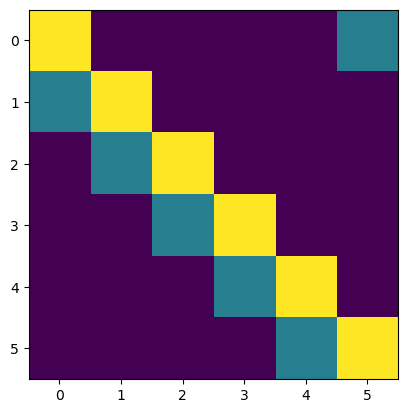

In [19]:
# stochastic cycling on a ring
ns = 6   # ring size
ps = 0.3  # shift probability
Ptr = np.zeros((ns, ns))  # transition matrix
for i in range(ns):
    Ptr[i,i] = 1 - ps
    Ptr[(i+1)%ns, i] = ps
plt.imshow(Ptr)
# create a Markov chain
ring = Markov(Ptr)
plt.show()

In [20]:
# a sample trajectory
T = 15
ring.sample(1, T)

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5])

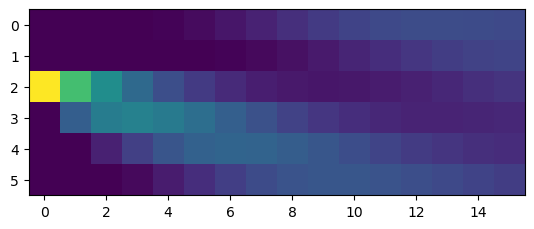

In [21]:
# forward message passing
alpha = ring.forward([0,0,1,0,0,0], T)
plt.imshow(alpha.T)
plt.show()

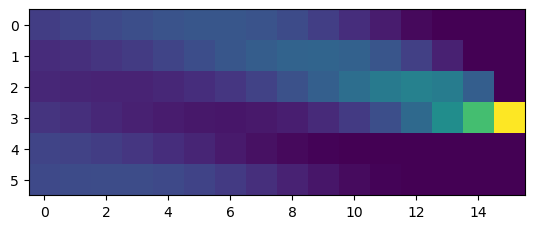

In [22]:
# backward message passing
beta = ring.backward([0,0,0,1,0,0], T)
plt.imshow(beta.T)
plt.show()

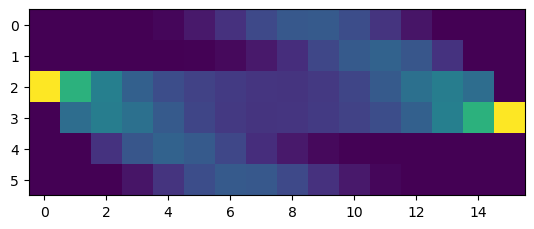

In [23]:
# posterior by their products
post = ring.posterior([0,0,1,0,0,0], [0,0,0,1,0,0], T)
plt.imshow(post.T)
plt.show()

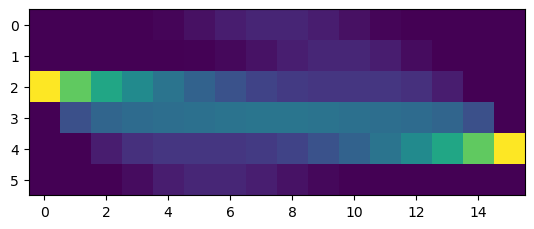

In [24]:
# a little shifted observation
post = ring.posterior([0,0,1,0,0,0], [0,0,0,0,1,0], T)
plt.imshow(post.T)
plt.show()

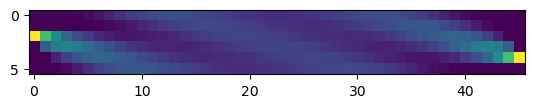

In [25]:
# longer sequence
post = ring.posterior([0,0,1,0,0,0], [0,0,0,0,1,0], 3*T)
plt.imshow(post.T)
plt.show()

## Dynamic Bayesian Inference

Iterative Bayesian inference can be generalized to the case when the hidden variable $x$ changes dynamically.

We denote the sequence of observation as

$$  y_{1:t}=(y_1,..,y_t) $$

and the history of underlying state variable as

$$  x_{1:t}=(x_1,..,x_t). $$

We assume two conditional probability distributions:

* Dynamics model: $p(x’|x)$

* Observation model: $p(y|x)$

Using the posterior $p(x_t|y_{1:t})$ computed from the data up to time $t$, we use the dymamics model to compute the *predictive prior*:

$$  p(x_{t+1}|y_{1:t}) = \int p(x_{t+1}|x_t) p(x_t|y_{1:t}) dx_t $$

by integrating or summing over the possible range of $x$.

We can combine this prior with the new coming data $y_{t+1}$ to update the posterior as:

$$  p(x_{t+1}|y_{1:t+1}) 
 = \frac{p(y_{t+1}|x_{t+1}) p(x_{t+1}|y_{1:t})}{ p(y_{1:t+1})}. $$

This is called *dynamic Bayesian inference* and allows real-time tracking of hidden variables from noisy observations.

When $x$ is discrete, the process is called *hidden Markov model (HMM)*, which has been used extensively speech processing.

Another example is *Kalman filter*, in which $x$ and $y$ are continuous and the dynamics and observation models are linear mapping with Gaussian noise.

### Hidden Markov model

Here is a simple implementation of HMM based on the Markov chain above.

In [26]:
class HMM(Markov):
    """Hidden Markov model"""

    def __init__(self, ptr, pobs):
        """Create HMM with transition and observation models"""
        super().__init__(ptr)
        self.pobs = pobs  # observation model
        self.No = len(pobs)  # number of observations
        self.pst = np.ones(self.Ns)/self.Ns  # state distribution
        self.pred = np.zeros(self.Ns)  # predictive distribution

    def sample(self, x0=0, step=10):
        """generate a sample sequence from x0"""
        xt = np.zeros(step, dtype=int) # state sequence
        yt = np.zeros(step, dtype=int) # observation sequence
        xt[0] = x0
        po = self.pobs[:, x0] # prob. of observation
        yt[0] = np.random.choice(self.No, p=po) # observe
        for t in range(1, step):
            ps = self.ptr[:, xt[t-1]]  # prob. of new states
            xt[t] = np.random.choice(self.Ns, p=ps) # transit 
            po = self.pobs[:, xt[t]]   # prob. of observation
            yt[t] = np.random.choice(self.No, p=po) # observe 
        return xt, yt

    def predict(self):
        """predictive prior by transition model"""
        self.pred = self.ptr @ self.pst
    
    def update(self, obs):
        """update posterior by observation"""
        prl = self.pobs[obs]*self.pred # likelihood*prior
        self.pst = prl/sum(prl)  #normalize

    def reset(self):
        """reset state probability"""
        self.pst = np.ones(self.Ns)/self.Ns  # uniform

    def step(self, obs):
        """one step of dynamic bayesian inference"""
        self.predict()
        self.update(obs)
        return self.pst  # new prior

Here is an example of directed random walk on a ring, like a mouse walking on a circular track.

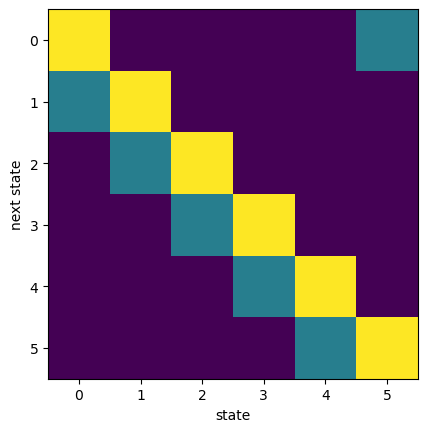

In [27]:
# random walk on a ring
ns = 6   # ring size
ps = 0.3  # shift probability
Ptr = np.zeros((ns, ns))  # transition matrix
for i in range(ns):
    Ptr[i,i] = 1 - ps
    Ptr[(i+1)%ns, i] = ps
plt.imshow(Ptr)
plt.xlabel("state"); plt.ylabel("next state");
plt.show()

Suppose we have three coarse position sensors, which send signal only intermittently, and we want to estimate where the mouse is.

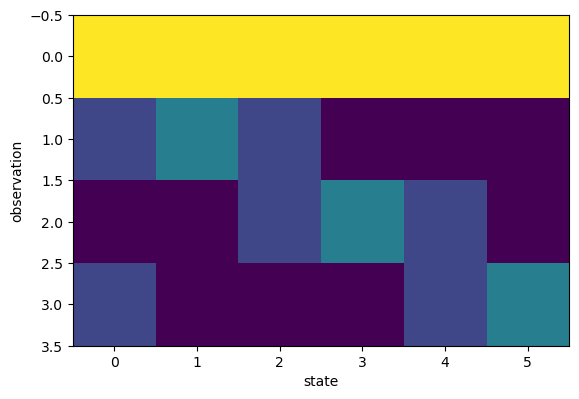

In [28]:
# Blurred intermittent observation model
no = 4
po = 0.3
Pobs = np.zeros((no, ns))  # p(obs|state)
Pobs[0,:] = 1 - po  # no information
Pobs[1,1] = Pobs[2,3] = Pobs[3,5] = po
Pobs[1,0] = Pobs[3,0] = Pobs[1:3,2] = Pobs[2:4,4] = po/2
plt.imshow(Pobs)
plt.xlabel("state"); plt.ylabel("observation");
plt.show()

In [29]:
# crate a HMM
ring = HMM(Ptr, Pobs)

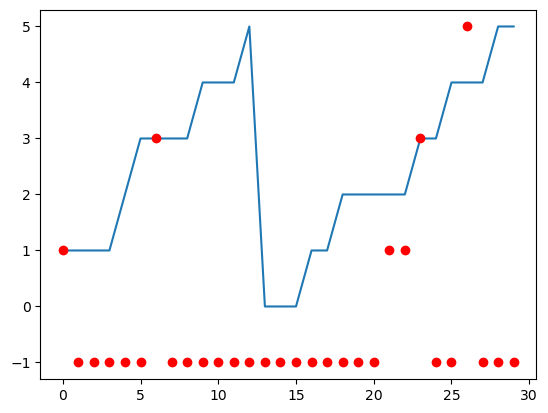

In [30]:
# sample a state trajectory and observations
T = 30
xt, yt, = ring.sample(1, T)
plt.plot(xt)
plt.plot(2*yt-1, 'ro');
plt.show()

From such noisy intermittent observations, how can we estimate the state?

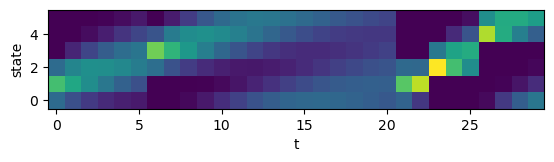

In [31]:
# Dynamic Bayesian inference in HMM
post = np.zeros((T, ns))  # posterior trajectory
ring.reset()
for t in range(T):
    post[t] = ring.step(yt[t])
plt.imshow(post.T, origin='lower')
plt.xlabel('t'); plt.ylabel('state');
plt.show()

Even when there is no useful sensory input, you can predict the state distribution by the dynamic model.
When a sensory input becomes available, prediction is corrected and sharpened.

After sensory input, you can also reflect back and consider which previous states were more likely using *forward-backward* algorithms.

## Bayesian sensorimotor processing

Our life is full of uncertainty. In sensory perception, we need to cope with noise, delay and occulusion and also overcome fundamental ill-posedness, such as to identify the 3D location of your target from 2D retinal images or sounds to two ears.

To find a practical solution to such ill-posed problems, we need to make use of some prior assumptions, such as the light usually comes from the top or objects don't jump abruptly.

Bayesian inference provides a principled way for combining any prior knowledge with sensory evidence. Indeed there are several lines of psychological evidence suggesting that humans and animals integrate knowledge from prior experience or multi-modal sensory information as predicted by Bayesian inference (Knill & Pouget 2004, Kording & Wolpert 2004, Doya et al. 2007).

% ![Koerding04](figures/Koerding04.png)

% While the subject tries to move the cursor to the target, a random shift is introduced to the hand-to-curs mapping. The subjects acquire a prior distribution of the cursor shift and combine that with sensory observations with variable uncertainties, as predicted by Bayesian inference (from Koerding & Wolpert, 2004).

## Bayesian computation in the brain

How such Bayesian computation realized in the brain? How does the brain represent and manipulate probability distributions?

One possibility is that the *receptive field* of a neuron represents a basis function in the sensory space and the activities of a population of neurons represent a probability distribution. This idea is called *probabilistic population code* (Zemel et al. 2004, Ma et al. 2006).

The cerebral cortex has a hierarchical organization and bi-directional connections between lower and higher areas originating from specific layers. 
There have been serveral hypotheses about how such hierarchical recurrent network can realize Bayesian inference, such as belif propagation (Lochmann & Deneve 2011) and variational *free energy* approximation (Friston 2005, 2010; Bogacz 2017).

>![Bogacz17](figures/Bogacz17.png)
>This tutorial illustrates how variational free-energy approximation of posterior probability works and how such mechanisms might be mapped onto the cortical circuit (from Bobacz 2017).

There has been only scarse attempts at directly testing those hypotheses, but a recent two-photon imaging experiment showed the evidence for dynamic Bayesian inference by populations of neurons in the parietal cortex (Funamizu et al. 2016).

## References

* Bishop CM (2006) Pattern Recognition and Machine Learning. Springer. https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/
    * Chapter 3: Bayesian linear regression  
    * Chapter 8: Graphical models
    
    
### Bayesian sensorimotor integration

* Knill DC, Pouget A (2004) The Bayesian brain: the role of uncertainty in neural coding and computation. Trends in neurosciences 27:712-719. https://doi.org/10.1016/j.tins.2004.10.007
* Körding KP, Wolpert DM (2004) Bayesian integration in sensorimotor learning. Nature 427:244-247. https://doi.org/10.1038/nature02169
* Doya K, Ishii S, Pouget A, Rao R (2007) Bayesian Brain: Probabilistic Approach to Neural Coding and Learning. MIT Press.


### Probabilistic population codes

* Zemel RS, Dayan P, Pouget A (1998) Probabilistic interpretation of population codes. Neural computation 10:403-430. https://doi.org/10.1162/089976698300017818
* Ma WJ, Beck JM, Latham PE, Pouget A (2006) Bayesian inference with probabilistic population codes. Nature neuroscience 9:1432-1438. https://doi.org/10.1038/nn1790


### Baysian inference in the cortical circuit

* Bogacz R (2017) A tutorial on the free-energy framework for modelling perception and learning. Journal of Mathematical Psychology. 76, 198–211. https://doi.org/10.1016/j.jmp.2015.11.003
* Friston K (2005). A theory of cortical responses. Philos Trans R Soc Lond B Biol Sci, 360, 815-36. http://doi.org/10.1098/rstb.2005.1622
* Friston K (2010). The free-energy principle: a unified brain theory? Nat Rev Neurosci, 11, 127-38. http://doi.org/10.1038/nrn2787
* Lochmann T, Deneve S (2011) Neural processing as causal inference. Current opinion in neurobiology 21:774-781. https://doi.org/10.1016/j.conb.2011.05.018
* Funamizu A, Kuhn B, Doya K (2016) Neural substrate of dynamic Bayesian inference in the cerebral cortex. Nature Neuroscience 19:1682-1689. https://doi.org/10.1038/nn.4390